In [13]:
from tensorflow.keras.models import Sequential  
from tensorflow.keras.layers import Dense  

import numpy as np
Data_set = np.loadtxt(
"https://raw.githubusercontent.com/SoongMoo/soldesk20231218/main/data/ThoraricSurgery3.csv"
, delimiter=",") 
X = Data_set[:,0:16]
y = Data_set[:,16]  # 0 / 1
# 딥러닝 모델의 구조를 결정
model = Sequential()               # 활성화함수  
model.add(Dense(30 , input_dim=16, activation="relu")) # 로드가 30개인 은닉층
model.add(Dense(1, activation="sigmoid"))
# 딥러닝 모델을 실행
             # 손실함수    
             #평균 제곱 오차와 로지스틱 회귀에서 사용한 교차 엔트로피 오차
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=['accuracy'])
# metrics : 모델 수행의 결과를 나타내게끔                                              
    # accuracy : 학습셋에 대한 정확도에 기반해 결과를 출력 
    # loss : 학습셋에 대한 손실 값을 나타냄
    # val_acc : 테스트셋에 대한 정확도를 나타냄
    # val_loss : 테스트셋에 대한 손실 값을 나타냄
# 모델을 실제로 수행하는 부분
#                  속성  클래스
history = model.fit(X  , y    , epochs=5, batch_size  = 16) 
# batch_size : 470개의 데이터를 한그룹에 몇개로 나눠서 실행한것인 지 지정

Epoch 1/5
30/30 [==============================] - 1s 1ms/step - loss: 6.8782 - accuracy: 0.1489
Epoch 2/5
30/30 [==============================] - 0s 1ms/step - loss: 0.6447 - accuracy: 0.7106
Epoch 3/5
30/30 [==============================] - 0s 1ms/step - loss: 0.5081 - accuracy: 0.8511
Epoch 4/5
30/30 [==============================] - 0s 1ms/step - loss: 0.4626 - accuracy: 0.8468
Epoch 5/5
30/30 [==============================] - 0s 2ms/step - loss: 0.4601 - accuracy: 0.8468


In [14]:
x1 = [1,3.19,2.5,1,0,0,0,1,0,0,0,0,1,1,0,66]
prediction  = model.predict([x1])
print(prediction)

1/1 [==============================] - 0s 65ms/step
[[0.25852647]]


In [ ]:
!pip install pandas
!pip install seaborn

In [17]:
import pandas as pd
# 피마 인디언 당뇨병 데이터셋
df = pd.read_csv("https://raw.githubusercontent.com/SoongMoo/soldesk20231218/main/data/pima-indians-diabetes3.csv")
df.head(5)
# 정상과 당뇨 환자가 각각 몇 명씩인지 조사해 봅니다.
df['diabetes'].value_counts()
df.describe()

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age,diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


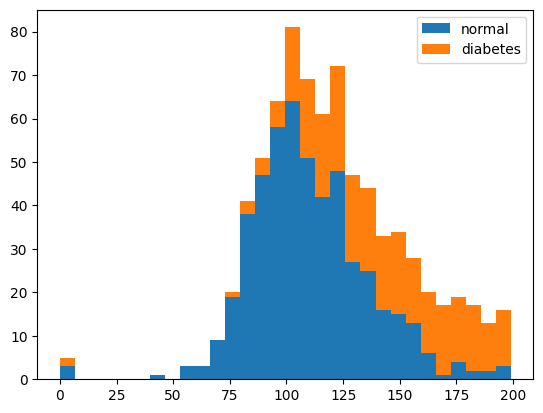

In [24]:
#정상과 당뇨가 어느 정도 비율로 분포하는지 살펴봅니다. 
import matplotlib.pyplot as plt
plt.hist(x = [df.plasma[df.diabetes==0], df.plasma[df.diabetes==1]], histtype='barstacked'
         , bins=30 , label=['normal','diabetes'] )
plt.legend()

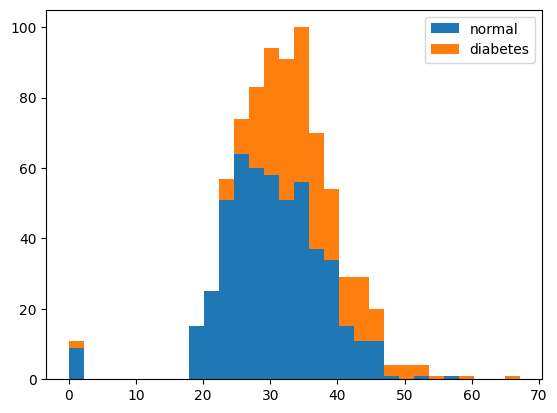

In [25]:
plt.hist(x = [df.bmi[df.diabetes==0], df.bmi[df.diabetes==1]], histtype='barstacked'
         , bins=30 , label=['normal','diabetes'] )
plt.legend()

In [56]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np 
Data_set = np.loadtxt("https://raw.githubusercontent.com/SoongMoo/soldesk20231218/main/data/pima-indians-diabetes3.csv"
            ,delimiter=",", skiprows=1)
# 세부 정보를 X로 지정합니다.
X = Data_set[:,0:8]
# 당뇨병 여부를 Y로 지정합니다.
y = Data_set[:,8 ]
# 모델을 설정
model = Sequential() # 모델 객체 생성
model.add(Dense(12, input_dim=8,activation="relu"  ))
model.add(Dense(8, activation="relu" ))
model.add(Dense(1, activation="sigmoid" ))
# 모델을 실행
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history=model.fit(X, y, epochs=100, batch_size=5)

In [57]:
test_set = [0,137,40,35,168,43.1,2.288,33]
prediction  = model.predict([test_set])
print(prediction)

1/1 [==============================] - 0s 42ms/step
[[0.82213396]]


In [93]:
df = pd.read_csv("https://raw.githubusercontent.com/SoongMoo/soldesk20231218/main/data/iris3.csv" 
                 , skiprows=1)
X = df.iloc[:, :4]
y = df.iloc[:, 4]

X = np.array(X) # DataFrame을 numpy변환
# 원-핫 인코딩 처리를 합니다.
# class가 문자열인 경우에는 원-핫 인코딩을 해줘야 한다.
y = np.array(pd.get_dummies(y)) # 원-핫 인코딩값을 numpy로 변환

model = Sequential()
model.add(Dense(12,  input_dim=4, activation='relu'))
model.add(Dense(8,  activation='relu'))
model.add(Dense(3, activation='softmax')) 

# 모델 컴파일
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# 모델 실행
history=model.fit(X, y, epochs=30, batch_size=5)

Epoch 1/30
30/30 [==============================] - 1s 1ms/step - loss: 1.0870 - accuracy: 0.6644
Epoch 2/30
30/30 [==============================] - 0s 1ms/step - loss: 1.0158 - accuracy: 0.6644
Epoch 3/30
30/30 [==============================] - 0s 1ms/step - loss: 0.9522 - accuracy: 0.6644
Epoch 4/30
30/30 [==============================] - 0s 1ms/step - loss: 0.8913 - accuracy: 0.6644
Epoch 5/30
30/30 [==============================] - 0s 1ms/step - loss: 0.8260 - accuracy: 0.6644
Epoch 6/30
30/30 [==============================] - 0s 1ms/step - loss: 0.7612 - accuracy: 0.6644
Epoch 7/30
30/30 [==============================] - 0s 1ms/step - loss: 0.6986 - accuracy: 0.6644
Epoch 8/30
30/30 [==============================] - 0s 1ms/step - loss: 0.6428 - accuracy: 0.6644
Epoch 9/30
30/30 [==============================] - 0s 1ms/step - loss: 0.5961 - accuracy: 0.6644
Epoch 10/30
30/30 [==============================] - 0s 1ms/step - loss: 0.5482 - accuracy: 0.7785
Epoch 11/30
30/30 [

In [104]:
new_data = [6.8,2.8,4.8,1.4]
# 모델로 예측 수행
predictions = model.predict([new_data])
# 예측값 출력
print("Raw predictions:", predictions) 
# 가장 높은 확률을 가진 클래스 선택
predicted_class = np.argmax(predictions)
# 예측된 클래스 출력
print("Predicted class: ", predicted_class)
if predicted_class == 0:
    print("Predicted class: iris-setosa")
elif predicted_class == 1:
    print("Predicted class: iris-versicolor")
elif predicted_class == 2:
    print("Predicted class: iris-verginica")

1/1 [==============================] - 0s 40ms/step
Raw predictions: [[0.00287752 0.83080196 0.16632058]]
Predicted class:  1
Predicted class: iris-versicolor


In [ ]:
!python.exe -m pip install --upgrade pip
!pip install scikit-learn

In [126]:
from sklearn.model_selection import train_test_split
df = pd.read_csv("https://raw.githubusercontent.com/SoongMoo/soldesk20231218/main/data/sonar3.csv")
df.iloc[:,60].value_counts()
X = df.iloc[:,0:60] # 0 ~59
y = df.iloc[:,60] # 60
# 학습셋 , 테스트 셋
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size = 0.3 , shuffle=True)
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)
# 모델을 설정
model = Sequential()
model.add(Dense(24, input_dim=60 , activation = 'relu'))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
# 모델 실행
model.compile(loss="binary_crossentropy" , optimizer = "adam" , metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=200,batch_size=10)
# 모델을 테스트셋에 적용해 정확도
score = model.evaluate(X_test, y_test)
score[1]

Epoch 1/200
15/15 [==============================] - 1s 1ms/step - loss: 0.7018 - accuracy: 0.5000
Epoch 2/200
15/15 [==============================] - 0s 2ms/step - loss: 0.6816 - accuracy: 0.5625
Epoch 3/200
15/15 [==============================] - 0s 2ms/step - loss: 0.6698 - accuracy: 0.6042
Epoch 4/200
15/15 [==============================] - 0s 1ms/step - loss: 0.6605 - accuracy: 0.6736
Epoch 5/200
15/15 [==============================] - 0s 1ms/step - loss: 0.6499 - accuracy: 0.7014
Epoch 6/200
15/15 [==============================] - 0s 1ms/step - loss: 0.6422 - accuracy: 0.6875
Epoch 7/200
15/15 [==============================] - 0s 2ms/step - loss: 0.6332 - accuracy: 0.7083
Epoch 8/200
15/15 [==============================] - 0s 2ms/step - loss: 0.6229 - accuracy: 0.7014
Epoch 9/200
15/15 [==============================] - 0s 1ms/step - loss: 0.6118 - accuracy: 0.7083
Epoch 10/200
15/15 [==============================] - 0s 2ms/step - loss: 0.6035 - accuracy: 0.7361
Epoch 11/

0.8571428656578064

In [143]:
test_set = [0.026,0.0363,0.0136,0.0272,0.0214,0.0338,0.0655,0.14,0.1843,0.2354,0.272,0.2442,0.1665,0.0336,0.1302,0.1708,0.2177,0.3175,0.3714,0.4552,0.57,0.7397,0.8062,0.8837,0.9432,1,0.9375,0.7603,0.7123,0.8358,0.7622,0.4567,0.1715,0.1549,0.1641,0.1869,0.2655,0.1713,0.0959,0.0768,0.0847,0.2076,0.2505,0.1862,0.1439,0.147,0.0991,0.0041,0.0154,0.0116,0.0181,0.0146,0.0129,0.0047,0.0039,0.0061,0.004,0.0036,0.0061,0.0115]
prediction  = model.predict([test_set])
print(prediction)
if prediction > 0.5:
    print("광물")
else:
    print("비광물")

1/1 [==============================] - 0s 44ms/step
[[0.8481738]]
광물


In [129]:
# 모델을 저장합니다. 
model.save('./data/model/my_model.hdf5')

C:\Users\sdedu\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [138]:
del model

In [140]:
from tensorflow.keras.models import load_model
# 모델을 새로 불러옵니다.
model = load_model('./data/model/my_model.hdf5') 

In [147]:
test_set = [0.02,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,0.1609,0.1582,0.2238,0.0645,0.066,0.2273,0.31,0.2999,0.5078,0.4797,0.5783,0.5071,0.4328,0.555,0.6711,0.6415,0.7104,0.808,0.6791,0.3857,0.1307,0.2604,0.5121,0.7547,0.8537,0.8507,0.6692,0.6097,0.4943,0.2744,0.051,0.2834,0.2825,0.4256,0.2641,0.1386,0.1051,0.1343,0.0383,0.0324,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.018,0.0084,0.009,0.0032]
prediction  = model.predict([test_set])
print(prediction)
if prediction > 0.5:
    print("광물")
else:
    print("비광물")

1/1 [==============================] - 0s 37ms/step
[[0.9993618]]
광물


In [145]:
from sklearn.model_selection import KFold
#몇 겹으로 나눌 것인지를 정합니다. 
k = 5
#분할하기 전에 샘플이 치우치지 않도록 섞어 줍니다.
kfold = KFold(n_splits = k, shuffle = True)
def model_fn():
    model = Sequential()
    model.add(Dense(24, input_dim=60 , activation = 'relu'))
    model.add(Dense(10, activation = 'relu'))
    model.add(Dense(1, activation = 'sigmoid'))
    return model
acc_score = []
# k교차 검증을 이용한 학습 : k번 학습
for train_index , test_index in kfold.split(X):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :] # 속성
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    X_train = np.array(X_train)
    X_test = np.array(X_test)
    y_train = np.array(y_train)
    y_test = np.array(y_test)
    model = model_fn()
    model.compile(loss="binary_crossentropy",optimizer= "adam",metrics=['accuracy'] )
    history = model.fit(X_train, y_train, epochs=200, batch_size=10, verbose=0)
    #정확도를 구합니다.
    accuracy = model.evaluate(X_test, y_test)[1]
    acc_score.append(accuracy)
avg_acc_score = sum(acc_score) / k
print('정확도:', acc_score)
print('정확도 평균:', avg_acc_score)

2/2 [==============================] - 0s 3ms/step - loss: 0.7559 - accuracy: 0.8049
정확도: [0.8571428656578064, 0.8095238208770752, 0.8780487775802612, 0.8292682766914368, 0.8048780560493469]
정확도 평균: 0.8357723593711853


In [148]:
test_set = [0.02,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,0.1609,0.1582,0.2238,0.0645,0.066,0.2273,0.31,0.2999,0.5078,0.4797,0.5783,0.5071,0.4328,0.555,0.6711,0.6415,0.7104,0.808,0.6791,0.3857,0.1307,0.2604,0.5121,0.7547,0.8537,0.8507,0.6692,0.6097,0.4943,0.2744,0.051,0.2834,0.2825,0.4256,0.2641,0.1386,0.1051,0.1343,0.0383,0.0324,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.018,0.0084,0.009,0.0032]
prediction  = model.predict([test_set])
print(prediction)
if prediction > 0.5:
    print("광물")
else:
    print("비광물")

1/1 [==============================] - 0s 37ms/step
[[0.9993618]]
광물


In [157]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/SoongMoo/soldesk20231218/main/data/wine.csv")
df
X = df.iloc[:,0:12]
y = df.iloc[:,12]
X_train, X_test, y_train, y_test = \
            train_test_split(X, y, test_size = 0.2, shuffle = True)

# 모델 구조를 설정
model = Sequential()
model.add(Dense(30, input_dim=12, activation = "relu"))
model.add(Dense(12, activation = "relu"))
model.add(Dense(8, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
X_train = np.array(X_train)
y_train = np.array(y_train) 
history = model.fit(X_train,y_train,epochs=250,  batch_size=500, validation_split=0.25)
# epochs=50는 순전파 50번 역번전파 50번을 의미                    # 0.8 * 0.25 = 0.2
                                                               # 60 : 20 : 20

Epoch 1/250
8/8 [==============================] - 1s 25ms/step - loss: 1.2282 - accuracy: 0.7596 - val_loss: 0.9787 - val_accuracy: 0.7475
Epoch 2/250
8/8 [==============================] - 0s 6ms/step - loss: 0.7385 - accuracy: 0.7688 - val_loss: 0.5323 - val_accuracy: 0.7821
Epoch 3/250
8/8 [==============================] - 0s 7ms/step - loss: 0.4032 - accuracy: 0.8335 - val_loss: 0.3628 - val_accuracy: 0.8607
Epoch 4/250
8/8 [==============================] - 0s 6ms/step - loss: 0.3118 - accuracy: 0.8891 - val_loss: 0.2787 - val_accuracy: 0.8953
Epoch 5/250
8/8 [==============================] - 0s 6ms/step - loss: 0.2409 - accuracy: 0.9130 - val_loss: 0.2576 - val_accuracy: 0.9061
Epoch 6/250
8/8 [==============================] - 0s 6ms/step - loss: 0.2273 - accuracy: 0.9202 - val_loss: 0.2484 - val_accuracy: 0.9145
Epoch 7/250
8/8 [==============================] - 0s 6ms/step - loss: 0.2159 - accuracy: 0.9258 - val_loss: 0.2371 - val_accuracy: 0.9145
Epoch 8/250
8/8 [=========

In [158]:
X_test = np.array(X_test)
y_test = np.array(y_test)
score=model.evaluate(X_test, y_test)
score[1]

41/41 [==============================] - 0s 1ms/step - loss: 0.0585 - accuracy: 0.9877


0.9876922965049744

In [159]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/SoongMoo/soldesk20231218/main/data/wine.csv"
                , header=None)
df
X = df.iloc[:,0:12]
y = df.iloc[:,12]
X_train, X_test, y_train, y_test = \
            train_test_split(X, y, test_size = 0.2, shuffle = True)
# 모델 구조를 설정
model = Sequential()
model.add(Dense(30, input_dim=12, activation = "relu"))
model.add(Dense(12, activation = "relu"))
model.add(Dense(8, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [160]:
# 학습이 언제 자동 중단 될지를 설정합니다.
early_stopping_callback = EarlyStopping (monitor = "val_loss" ,  patience=20)
# 최적화 모델이 저장될 폴더와 모델의 이름을 정합니다.
modelpath = "./data/model/bestmodel.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath,monitor = "val_loss" ,verbose=0, save_best_only=True)
#모델을 실행합니다.
X_train = np.array(X_train)
y_train = np.array(y_train)
hoistory = model.fit(X_train, y_train, epochs=2000 ,batch_size=500, validation_split=0.25, verbose=1,callbacks=[early_stopping_callback, checkpointer]  )

Epoch 1/2000
8/8 [==============================] - 1s 27ms/step - loss: 0.6539 - accuracy: 0.7526 - val_loss: 0.4990 - val_accuracy: 0.7646
Epoch 2/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.4629 - accuracy: 0.7526 - val_loss: 0.3911 - val_accuracy: 0.7646
Epoch 3/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.4049 - accuracy: 0.7526 - val_loss: 0.3763 - val_accuracy: 0.7692
Epoch 4/2000
1/8 [==>...........................] - ETA: 0s - loss: 0.3771 - accuracy: 0.7780

C:\Users\sdedu\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


8/8 [==============================] - 0s 9ms/step - loss: 0.3868 - accuracy: 0.7616 - val_loss: 0.3604 - val_accuracy: 0.7877
Epoch 5/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.3729 - accuracy: 0.7814 - val_loss: 0.3451 - val_accuracy: 0.8162
Epoch 6/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.3534 - accuracy: 0.8155 - val_loss: 0.3208 - val_accuracy: 0.8485
Epoch 7/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.3220 - accuracy: 0.8609 - val_loss: 0.2880 - val_accuracy: 0.8854
Epoch 8/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.2864 - accuracy: 0.8948 - val_loss: 0.2539 - val_accuracy: 0.9146
Epoch 9/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.2549 - accuracy: 0.9107 - val_loss: 0.2217 - val_accuracy: 0.9246
Epoch 10/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.2281 - accuracy: 0.9225 - val_loss: 0.2076 - val_accuracy: 0.9300
Epoch 11/2000
8/8 [=============

In [161]:
X_test = np.array(X_test)
y_test = np.array(y_test)
score = model.evaluate(X_test, y_test)
score[1]

41/41 [==============================] - 0s 1ms/step - loss: 0.0615 - accuracy: 0.9808


0.9807692170143127